<a href="https://colab.research.google.com/github/AdemilsonMiguel/ProjetoVsCode/blob/main/Previs%C3%A3o_A%C3%A7%C3%B5es.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance 

In [ ]:
from fbprophet import Prophet

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import yfinance as yf
import pandas_datareader.data as web
yf.pdr_override()

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 20,10

In [ ]:
preco = web.get_data_yahoo('AMZO34.SA', period='1y')

[*********************100%***********************]  1 of 1 completed


In [ ]:
preco

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-07-21,5.9800,6.0240,5.8930,5.9095,5.9095,3105460
2021-07-22,5.9270,6.0385,5.9165,6.0360,6.0360,1257960
2021-07-23,6.0350,6.0980,5.9645,6.0825,6.0825,1900860
2021-07-26,6.0990,6.1250,6.0535,6.1000,6.1000,2415420
2021-07-27,6.1025,6.1295,5.9070,5.9700,5.9700,1462460
...,...,...,...,...,...,...
2022-07-15,3.8400,3.9800,3.8400,3.8700,3.8700,5773564
2022-07-18,3.9200,4.0000,3.8900,3.9100,3.9100,3446619
2022-07-19,3.9600,4.0700,3.8900,4.0500,4.0500,3562811


In [ ]:
fech = preco['Adj Close']

In [ ]:
fech

Date
2021-07-21    5.9095
2021-07-22    6.0360
2021-07-23    6.0825
2021-07-26    6.1000
2021-07-27    5.9700
               ...  
2022-07-15    3.8700
2022-07-18    3.9100
2022-07-19    4.0500
2022-07-20    4.2300
2022-07-21    4.3300
Name: Adj Close, Length: 251, dtype: float64

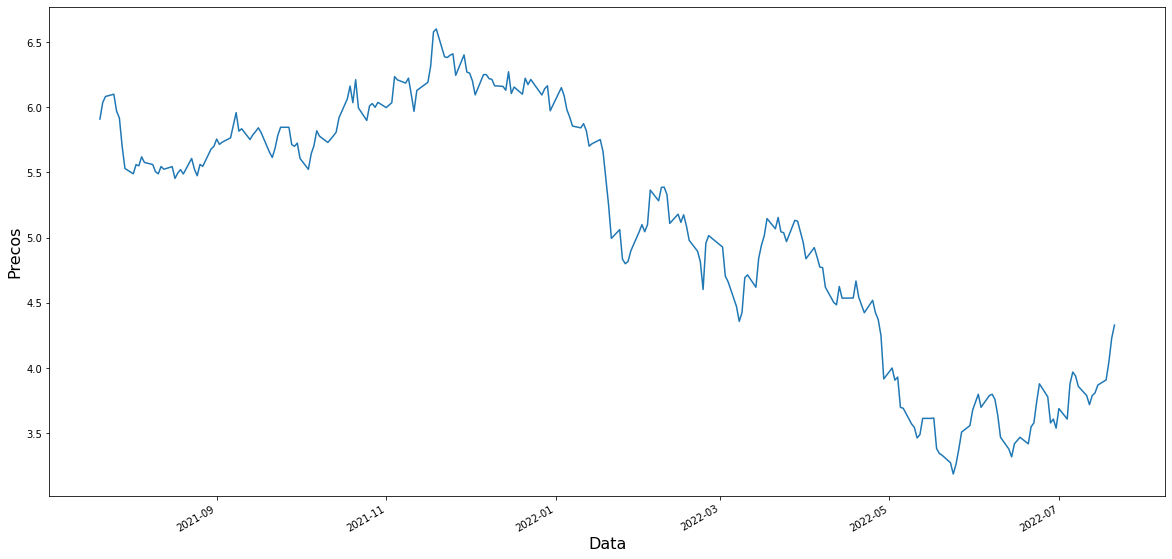

In [ ]:
fech.plot()
plt.xlabel('Data', size=16)
plt.ylabel('Precos', size=16)
plt.show()

In [ ]:
dados = pd.DataFrame(fech)
dados

,Adj Close
Date,
2021-07-21,5.9095
2021-07-22,6.0360
2021-07-23,6.0825
2021-07-26,6.1000
2021-07-27,5.9700
...,...
2022-07-15,3.8700
2022-07-18,3.9100
2022-07-19,4.0500


In [ ]:
#Resetar indice de data  /  dados = dados.reset_index('Date', inplace=True)
dados = dados.reset_index('Date')

In [ ]:
dados

,Date,Adj Close
0,2021-07-21,5.9095
1,2021-07-22,6.0360
2,2021-07-23,6.0825
3,2021-07-26,6.1000
4,2021-07-27,5.9700
...,...,...
246,2022-07-15,3.8700
247,2022-07-18,3.9100
248,2022-07-19,4.0500
249,2022-07-20,4.2300


In [ ]:
#Ajustando nomes das colunas para utilizar o Prophet
dados.columns = ['ds', 'y']
dados

,ds,y
0,2021-07-21,5.9095
1,2021-07-22,6.0360
2,2021-07-23,6.0825
3,2021-07-26,6.1000
4,2021-07-27,5.9700
...,...,...
246,2022-07-15,3.8700
247,2022-07-18,3.9100
248,2022-07-19,4.0500
249,2022-07-20,4.2300


In [ ]:
dados.dtypes

ds    datetime64[ns]
y            float64
dtype: object

In [ ]:
#Modelo preditivo
modelo = Prophet()
modelo.fit(dados)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
#Data futuro
data_futuro = pd.date_range(start='2022-07-22', end='2022-12-31')

In [ ]:
data_futuro

DatetimeIndex(['2022-07-22', '2022-07-23', '2022-07-24', '2022-07-25',
               '2022-07-26', '2022-07-27', '2022-07-28', '2022-07-29',
               '2022-07-30', '2022-07-31',
               ...
               '2022-12-22', '2022-12-23', '2022-12-24', '2022-12-25',
               '2022-12-26', '2022-12-27', '2022-12-28', '2022-12-29',
               '2022-12-30', '2022-12-31'],
              dtype='datetime64[ns]', length=163, freq='D')

In [ ]:
#Tranformar em dataframe
df = pd.DataFrame(data_futuro)

In [ ]:
df.columns = ['ds']

In [ ]:
df

,ds
0,2022-07-22
1,2022-07-23
2,2022-07-24
3,2022-07-25
4,2022-07-26
...,...
158,2022-12-27
159,2022-12-28
160,2022-12-29
161,2022-12-30


In [ ]:
previsao = modelo.predict(df)

In [ ]:
previsao

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2022-07-22,3.668441,3.252466,3.925687,3.668441,3.668441,-0.084338,-0.084338,-0.084338,-0.084338,-0.084338,-0.084338,0.0,0.0,0.0,3.584103
1,2022-07-23,3.664689,3.442949,4.149728,3.664689,3.664689,0.141258,0.141258,0.141258,0.141258,0.141258,0.141258,0.0,0.0,0.0,3.805947
2,2022-07-24,3.660936,3.467960,4.140054,3.660936,3.660936,0.141258,0.141258,0.141258,0.141258,0.141258,0.141258,0.0,0.0,0.0,3.802194
3,2022-07-25,3.657184,3.263617,3.955696,3.656950,3.657419,-0.061049,-0.061049,-0.061049,-0.061049,-0.061049,-0.061049,0.0,0.0,0.0,3.596135
4,2022-07-26,3.653432,3.281490,3.958847,3.652666,3.654294,-0.050180,-0.050180,-0.050180,-0.050180,-0.050180,-0.050180,0.0,0.0,0.0,3.603251
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158,2022-12-27,3.075560,2.219145,3.877976,2.381604,3.859777,-0.050180,-0.050180,-0.050180,-0.050180,-0.050180,-0.050180,0.0,0.0,0.0,3.025379
159,2022-12-28,3.071807,2.227434,3.864902,2.369221,3.864057,-0.046806,-0.046806,-0.046806,-0.046806,-0.046806,-0.046806,0.0,0.0,0.0,3.025001
160,2022-12-29,3.068055,2.262921,3.892050,2.356838,3.868023,-0.040141,-0.040141,-0.040141,-0.040141,-0.040141,-0.040141,0.0,0.0,0.0,3.027913
161,2022-12-30,3.064302,2.190268,3.812546,2.346811,3.871998,-0.084338,-0.084338,-0.084338,-0.084338,-0.084338,-0.084338,0.0,0.0,0.0,2.979964


In [ ]:
previsao[ ['ds', 'yhat', 'yhat_lower', 'yhat_upper'] ]

,ds,yhat,yhat_lower,yhat_upper
0,2022-07-22,3.584103,3.252466,3.925687
1,2022-07-23,3.805947,3.442949,4.149728
2,2022-07-24,3.802194,3.467960,4.140054
3,2022-07-25,3.596135,3.263617,3.955696
4,2022-07-26,3.603251,3.281490,3.958847
...,...,...,...,...
158,2022-12-27,3.025379,2.219145,3.877976
159,2022-12-28,3.025001,2.227434,3.864902
160,2022-12-29,3.027913,2.262921,3.892050
161,2022-12-30,2.979964,2.190268,3.812546


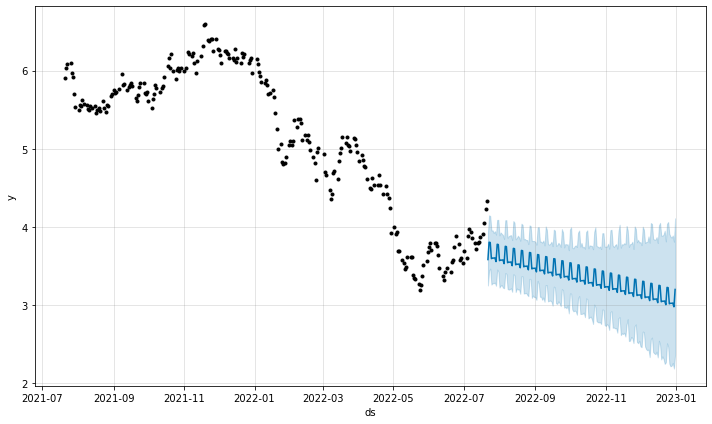

In [ ]:
modelo.plot(previsao)
plt.show()

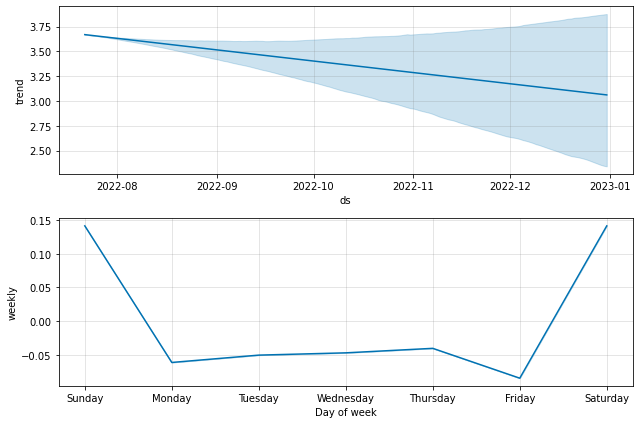

In [ ]:
modelo.plot_components(previsao)
plt.show()

In [ ]:
from fbprophet.plot import plot_plotly, plot_components_plotly

In [ ]:
plot_plotly(modelo, previsao)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [ ]:
dados

,ds,y
0,2021-07-21,5.9095
1,2021-07-22,6.0360
2,2021-07-23,6.0825
3,2021-07-26,6.1000
4,2021-07-27,5.9700
...,...,...
246,2022-07-15,3.8700
247,2022-07-18,3.9100
248,2022-07-19,4.0500
249,2022-07-20,4.2300


In [ ]:
#Treino e teste
dados_train, dados_test = train_test_split(dados, test_size=0.3, shuffle=False)

In [ ]:
dados_train

,ds,y
0,2021-07-21,5.9095
1,2021-07-22,6.0360
2,2021-07-23,6.0825
3,2021-07-26,6.1000
4,2021-07-27,5.9700
...,...,...
170,2022-03-28,5.1330
171,2022-03-29,5.1265
172,2022-03-30,5.0465
173,2022-03-31,4.9650


In [ ]:
dados_test

,ds,y
175,2022-04-04,4.9240
176,2022-04-05,4.8525
177,2022-04-06,4.7750
178,2022-04-07,4.7700
179,2022-04-08,4.6200
...,...,...
246,2022-07-15,3.8700
247,2022-07-18,3.9100
248,2022-07-19,4.0500
249,2022-07-20,4.2300


In [ ]:
#Criar novo modelo para previsão
modelo2 = Prophet()

In [ ]:
modelo2.fit(dados_train)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
previsao2 = modelo2.predict(pd.DataFrame(dados_test['ds']))

In [ ]:
y_prev = previsao2['yhat'].values
y_true = dados_test['y'].values

In [ ]:
mean_squared_error(y_true, y_prev)

0.4182805957262057

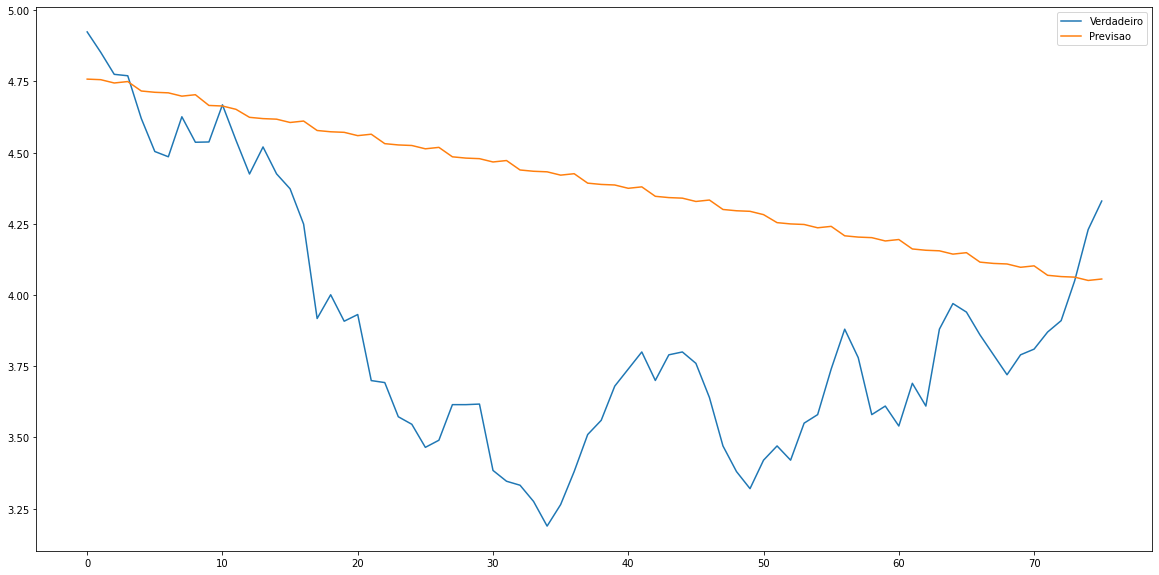

In [ ]:
plt.plot(y_true, label='Verdadeiro')
plt.plot(y_prev, label='Previsao')
plt.legend()

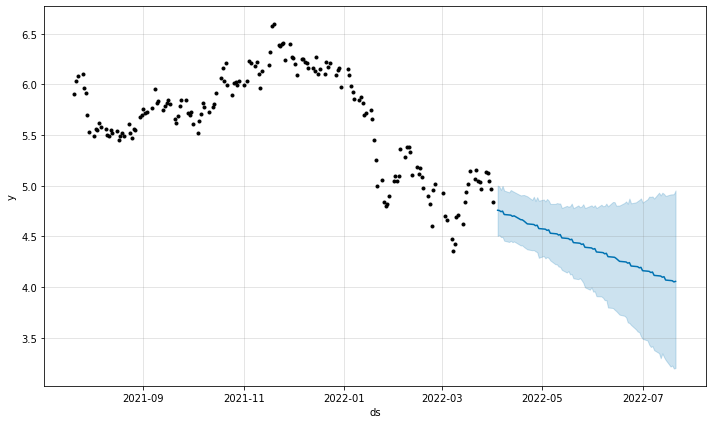

In [ ]:
#Amplitude de variação
modelo2.plot(previsao2)
plt.show()